## Implement a KNN model to classify the animals in to categorie

In [1]:
#importing requried libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset using pandas
data=pd.read_csv('Zoo.csv')

## Performing EDA

In [3]:
#displaying  first 5 records 
data.head()

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1

In [4]:
#displaying last 5 records
data.tail()

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
96         1     1  
97         0     6  
98         1     1  
99         0     7  
100        0     2

In [5]:
#shape of dataset
data.shape   

(101, 18)

Dataset has 101 rows and 18 columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

In [7]:
data.describe()

hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.491512    0.384605    0.407844    0.271410    0.376013   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    1.000000    1.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             legs        tail    domestic     catsize        type  
count  101.000000  101.000000  101.000000  101.000000  101.000000  
mean     2.841584    0.742574    0.128713    0.435644    2.831683  
std      2.033385    0.439397    0.336552    0.498314    2.102709  
min      0.000000    0.000000    0.000000    0.000000    1.000000  
25%      2.000000    0.000000    0.000000    0.000000    1.000000  
50%      4.000000    1.000000    0.000000    0.000000    2.000000  
75%      4.000000    1.000000    0.000000    1.000000    4.000000  
max      8.000000    1.000000    1.000000    1.000000    7.000000

The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.

In [8]:
data.ndim

2

In [9]:
data.axes

[RangeIndex(start=0, stop=101, step=1),
 Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
        'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
        'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
       dtype='object')]

axes is a function of the matplotlib library that adds axes to the current graph and makes it as current axes.

In [10]:
data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [11]:
#renaming the column
data=data.rename({'animal name':'animal_name'},axis=1)

In [12]:
data.head()

animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1

In [13]:
data['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [14]:
#displaying data by pie chart
fig = plt.figure(figsize = (10, 5))
fig = px.pie(data['type'],values='type',names='type',title='Animals in categorie')

fig.show()

<Figure size 1000x500 with 0 Axes>

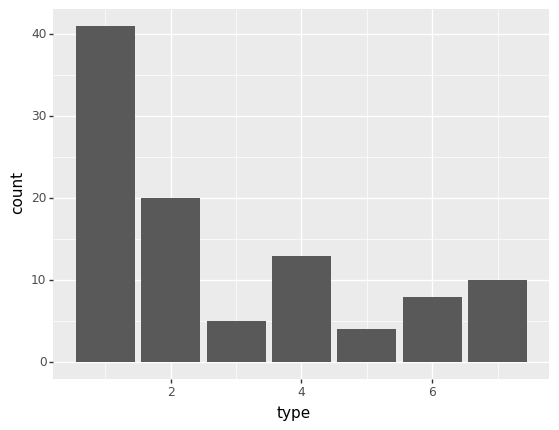

<ggplot: (146881661064)>

In [15]:
from plotnine.data import huron
from plotnine import ggplot, aes, stat_bin, geom_bar

ggplot(data) + aes(x="type",fill='type') + geom_bar()

1. Most of the animals comes under the 1st category
2. While the 5th type as low numbers of animals

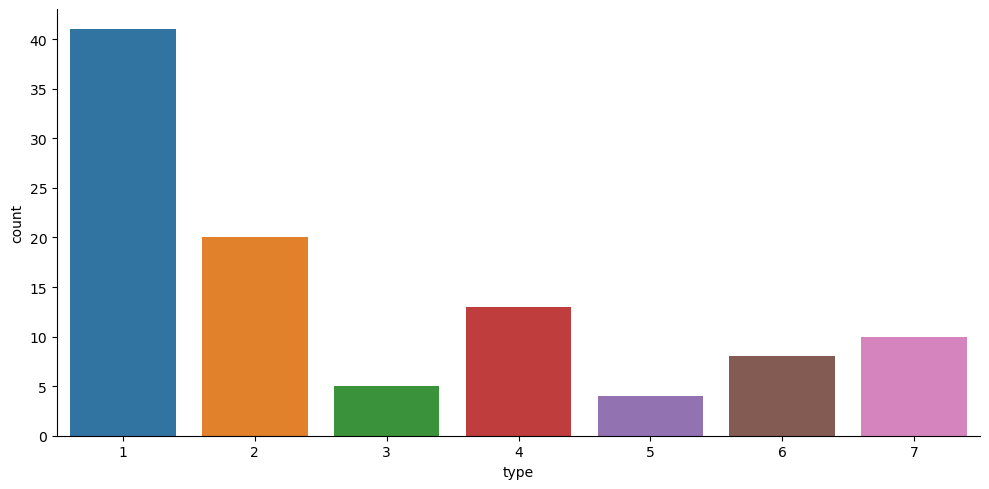

In [16]:
#displaying data by pie chart
sns.factorplot('type', data=data, kind="count",size = 5,aspect = 2)

In [17]:
#unique names of animal in our dataset
data['animal_name'].unique

<bound method Series.unique of 0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal_name, Length: 101, dtype: object>

In [18]:
#unique names of animal in our dataset
data['animal_name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal_name, Length: 100, dtype: int64

In [19]:
data[data['animal_name']=='frog']

animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
25        frog     0         0     1     0         0        1         1   
26        frog     0         0     1     0         0        1         1   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
25        1         1         1         0     0     4     0         0   
26        1         1         1         1     0     4     0         0   

    catsize  type  
25        0     5  
26        0     5

#### observation: find that one frog is venomous and another one is not 

In [20]:
# change the venomous one into frog2 to seperate 2 kinds of frog 
data['animal_name'][(data['venomous'] == 1 ) & (data['animal_name'] == 'frog')] = "frog2"

In [21]:
data.head(27)

animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0     aardvark     1         0     0     1         0        0         1   
1     antelope     1         0     0     1         0        0         0   
2         bass     0         0     1     0         0        1         1   
3         bear     1         0     0     1         0        0         1   
4         boar     1         0     0     1         0        0         1   
5      buffalo     1         0     0     1         0        0         0   
6         calf     1         0     0     1         0        0         0   
7         carp     0         0     1     0         0        1         0   
8      catfish     0         0     1     0         0        1         1   
9         cavy     1         0     0     1         0        0         0   
10     cheetah     1         0     0     1         0        0         1   
11     chicken     0         1     1     0         1        0         0   
12        chub     0         0     1     0         0        1         1   
13        clam     0         0     1     0         0        0         1   
14        crab     0         0     1     0         0        1         1   
15    crayfish     0         0     1     0         0        1         1   
16        crow     0         1     1     0         1        0         1   
17        deer     1         0     0     1         0        0         0   
18     dogfish     0         0     1     0         0        1         1   
19     dolphin     0         0     0     1         0        1         1   
20        dove     0         1     1     0         1        0         0   
21        duck     0         1     1     0         1        1         0   
22    elephant     1         0     0     1         0        0         0   
23    flamingo     0         1     1     0         1        0         0   
24        flea     0         0     1     0         0        0         0   
25        frog     0         0     1     0         0        1         1   
26       frog2     0         0     1     0         0        1         1   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0         1         1         1         0     0     4     0         0   
1         1         1         1         0     0     4     1         0   
2         1         1         0         0     1     0     1         0   
3         1         1         1         0     0     4     0         0   
4         1         1         1         0     0     4     1         0   
5         1         1         1         0     0     4     1         0   
6         1         1         1         0     0     4     1         1   
7         1         1         0         0     1     0     1         1   
8         1         1         0         0     1     0     1         0   
9         1         1         1         0     0     4     0         1   
10        1         1         1         0     0     4     1         0   
11        0         1         1         0     0     2     1         1   
12        1         1         0         0     1     0     1         0   
13        0         0         0         0     0     0     0         0   
14        0         0         0         0     0     4     0         0   
15        0         0         0         0     0     6     0         0   
16        0         1         1         0     0     2     1         0   
17        1         1         1         0     0     4     1         0   
18        1         1         0         0     1     0     1         0   
19        1         1         1         0     1     0     1         0   
20        0         1         1         0     0     2     1         1   
21        0         1         1         0     0     2     1         0   
22        1         1         1         0     0     4     1         0   
23        0         1         1         0     0     2     1         0   
24        0         0         1         0     0     6     0         0   
25  

In [22]:
data['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

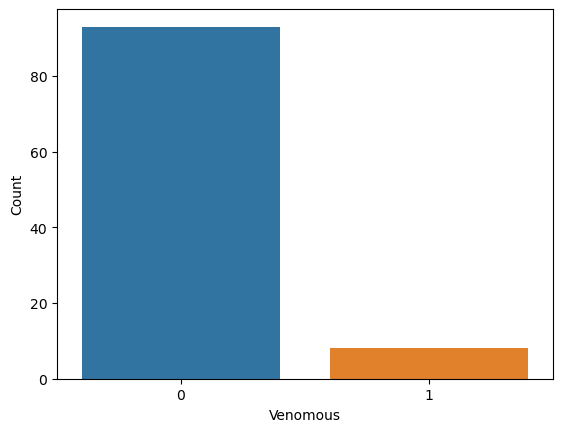

In [23]:
#displaying  animals weather they are 'venomous' or not
sns.countplot(x="venomous", data=data)
plt.xlabel("Venomous")
plt.ylabel("Count")
plt.show()

#### In our dataset 93 animals are not venomous while 8 are venomous.So, the dataset contains less harmless animals

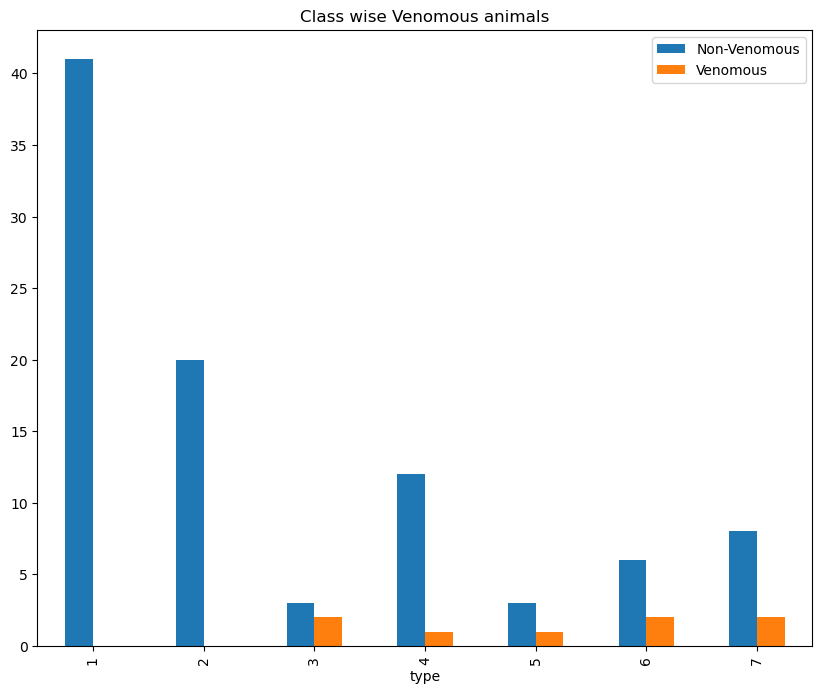

In [24]:
pd.crosstab(data['type'], data['venomous']).plot(kind="bar", figsize=(10, 8), title="Class wise Venomous animals");
plt.legend(['Non-Venomous','Venomous'])
plt.plot();

#### In type 1 and 2 there are no any Venomous animals are present

In [25]:
# finding Unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in data.hair]
unique_color = list(set(color_list))
unique_color

['red', 'blue']

In [26]:
data['hair'].value_counts()

0    58
1    43
Name: hair, dtype: int64

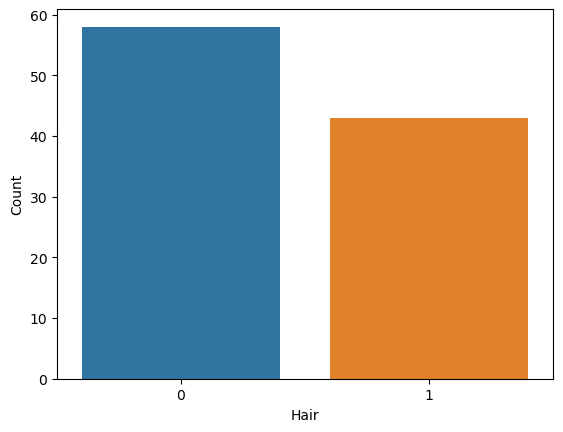

In [27]:
#displaying  animals weather they have 'hair' or not
sns.countplot(x="hair", data=data)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()

#### In our dataset 58 animals are in blue colour while 43 are have red color

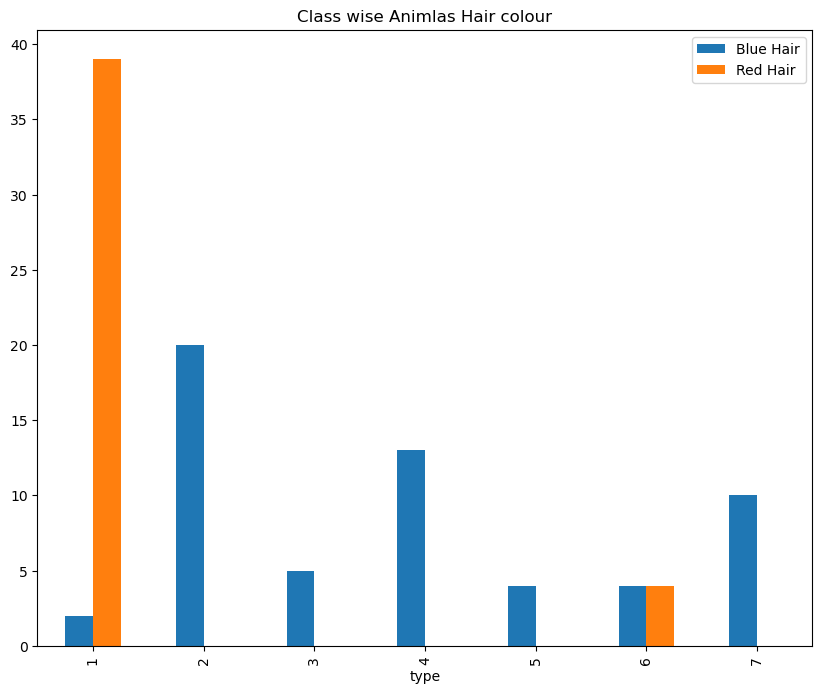

In [28]:
pd.crosstab(data['type'], data['hair']).plot(kind="bar", figsize=(10, 8), title="Class wise Animlas Hair colour");
plt.legend(['Blue Hair','Red Hair'])
plt.plot();

#### Olny type 1 and 6 has animals which contains Red Hair

[]

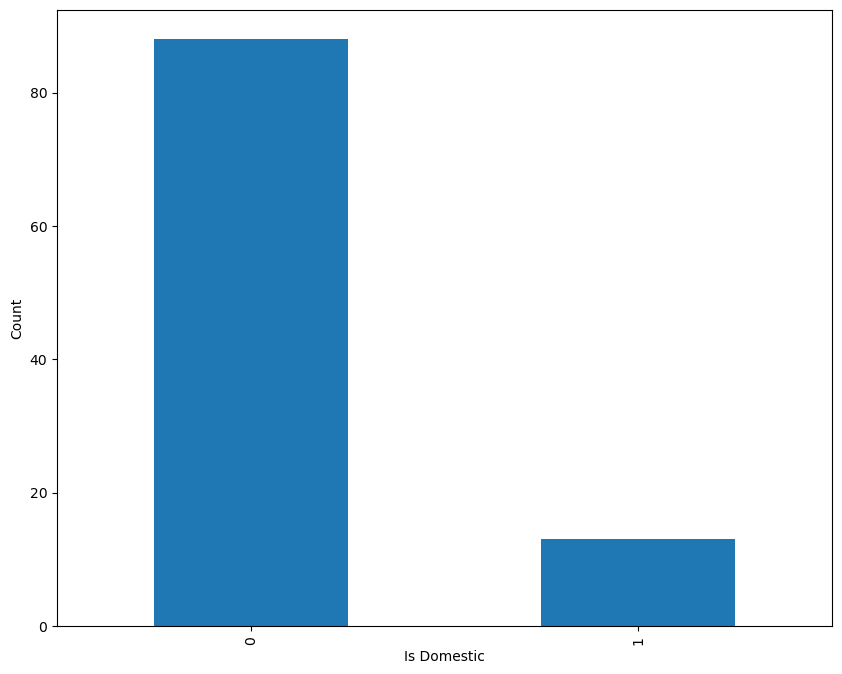

In [29]:
# Lets plot how many animals are domestic or not
plt.figure(figsize=(10,8));
data['domestic'].value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot()

#### So we can see mostly animals are not domestic.

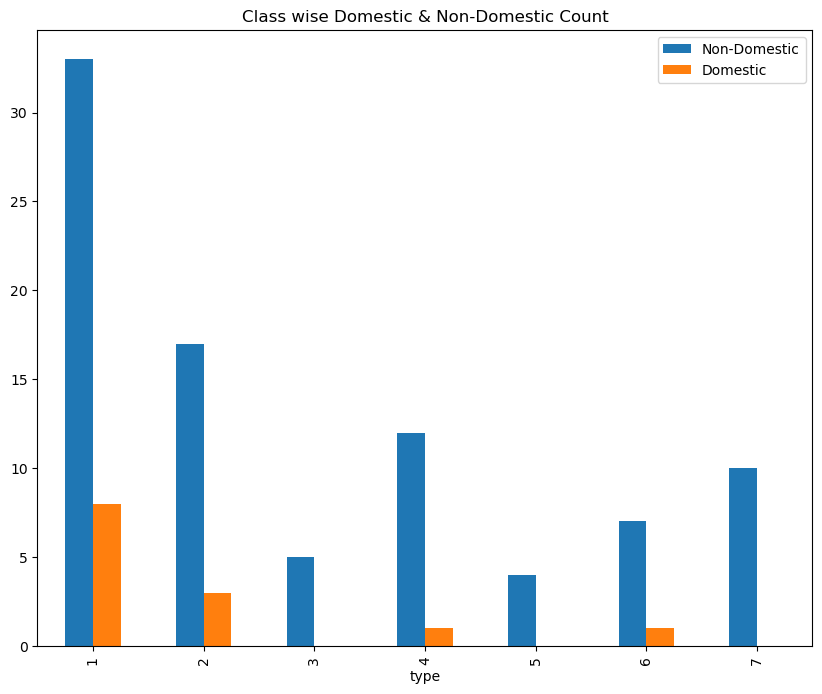

In [30]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(data['type'], data['domestic']).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.legend(['Non-Domestic','Domestic'])
plt.plot();

#### In type 3,5 and 7 there are no any domestic animals are present

In [31]:
pd.crosstab(data['type'], data['domestic'])

domestic   0  1
type           
1         33  8
2         17  3
3          5  0
4         12  1
5          4  0
6          7  1
7         10  0

In [32]:
# Lets see how many animals provides us milk
data['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

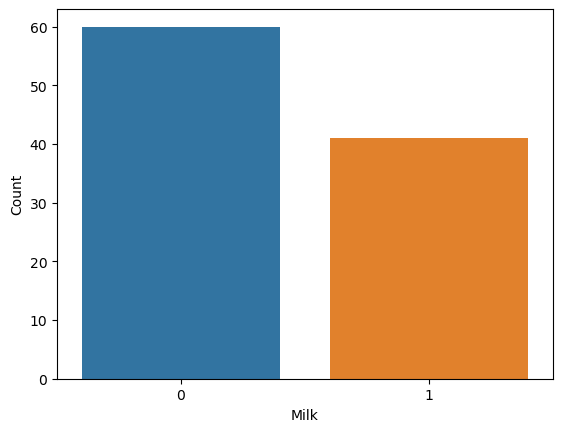

In [33]:
# Lets see how many animals provides us milk by visualization
sns.countplot(x="milk", data=data)
plt.xlabel("Milk")
plt.ylabel("Count")
plt.show()

#### So there are 41 animals in the list which provides us milk. Lets see to which category they belongs

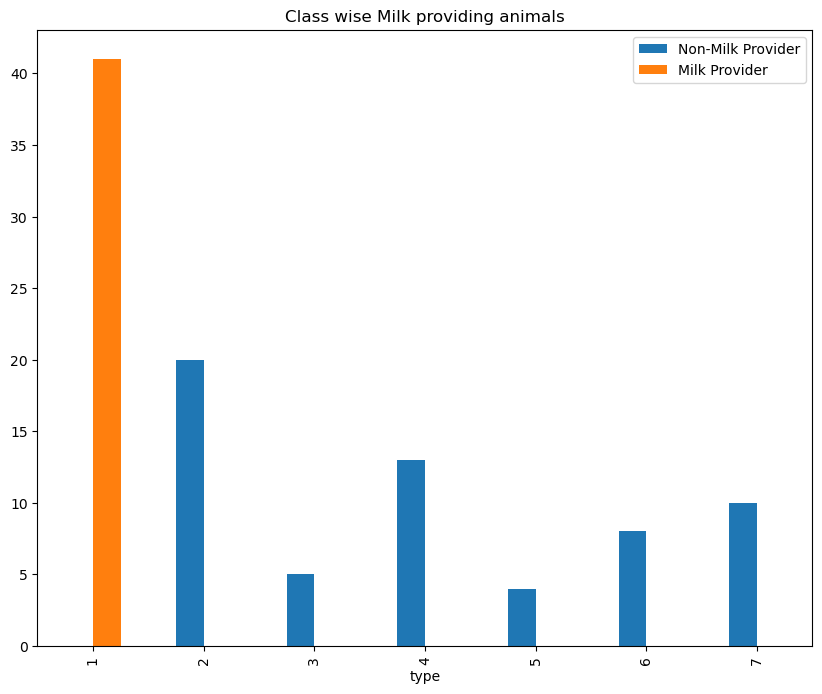

In [34]:
pd.crosstab(data['type'], data['milk']).plot(kind="bar", figsize=(10, 8), title="Class wise Milk providing animals");
plt.legend(['Non-Milk Provider','Milk Provider'])
plt.plot();

#### The animals present in type 1 they are only milk provider

In [35]:
pd.crosstab(data['type'], data['milk'])

milk   0   1
type        
1      0  41
2     20   0
3      5   0
4     13   0
5      4   0
6      8   0
7     10   0

In [36]:
# Lets see how many animals are aquatic
data['aquatic'].value_counts()

0    65
1    36
Name: aquatic, dtype: int64

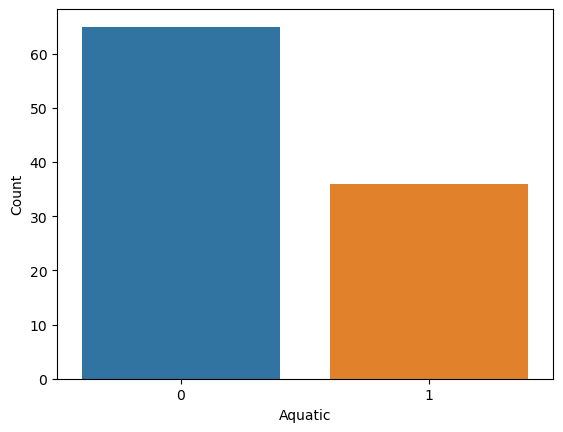

In [37]:
# Lets see how many animals are aquatic by visualization
sns.countplot(x="aquatic", data=data)
plt.xlabel("Aquatic")
plt.ylabel("Count")
plt.show()

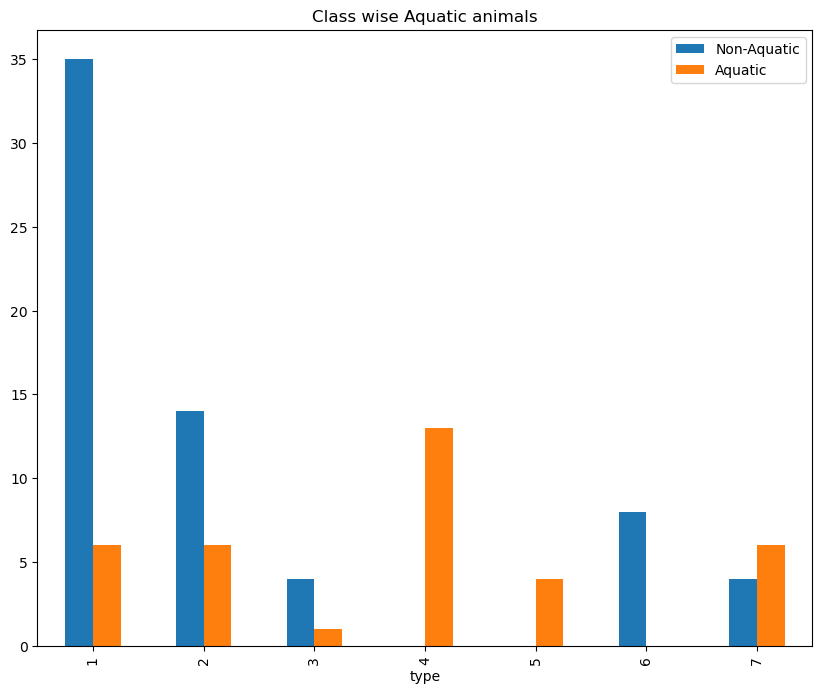

In [38]:
pd.crosstab(data['type'], data['aquatic']).plot(kind="bar", figsize=(10, 8), title="Class wise Aquatic animals");
plt.legend(['Non-Aquatic','Aquatic'])
plt.plot();

#### The animals present in type 4 and 5 they are no any non-aquatic animal found

In [39]:
#checking for NA values
data.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [40]:
#checking for duplicated values
data[data.duplicated()].shape

(0, 18)

#### There are no any record has been duplicated

<Figure size 2500x1500 with 0 Axes>

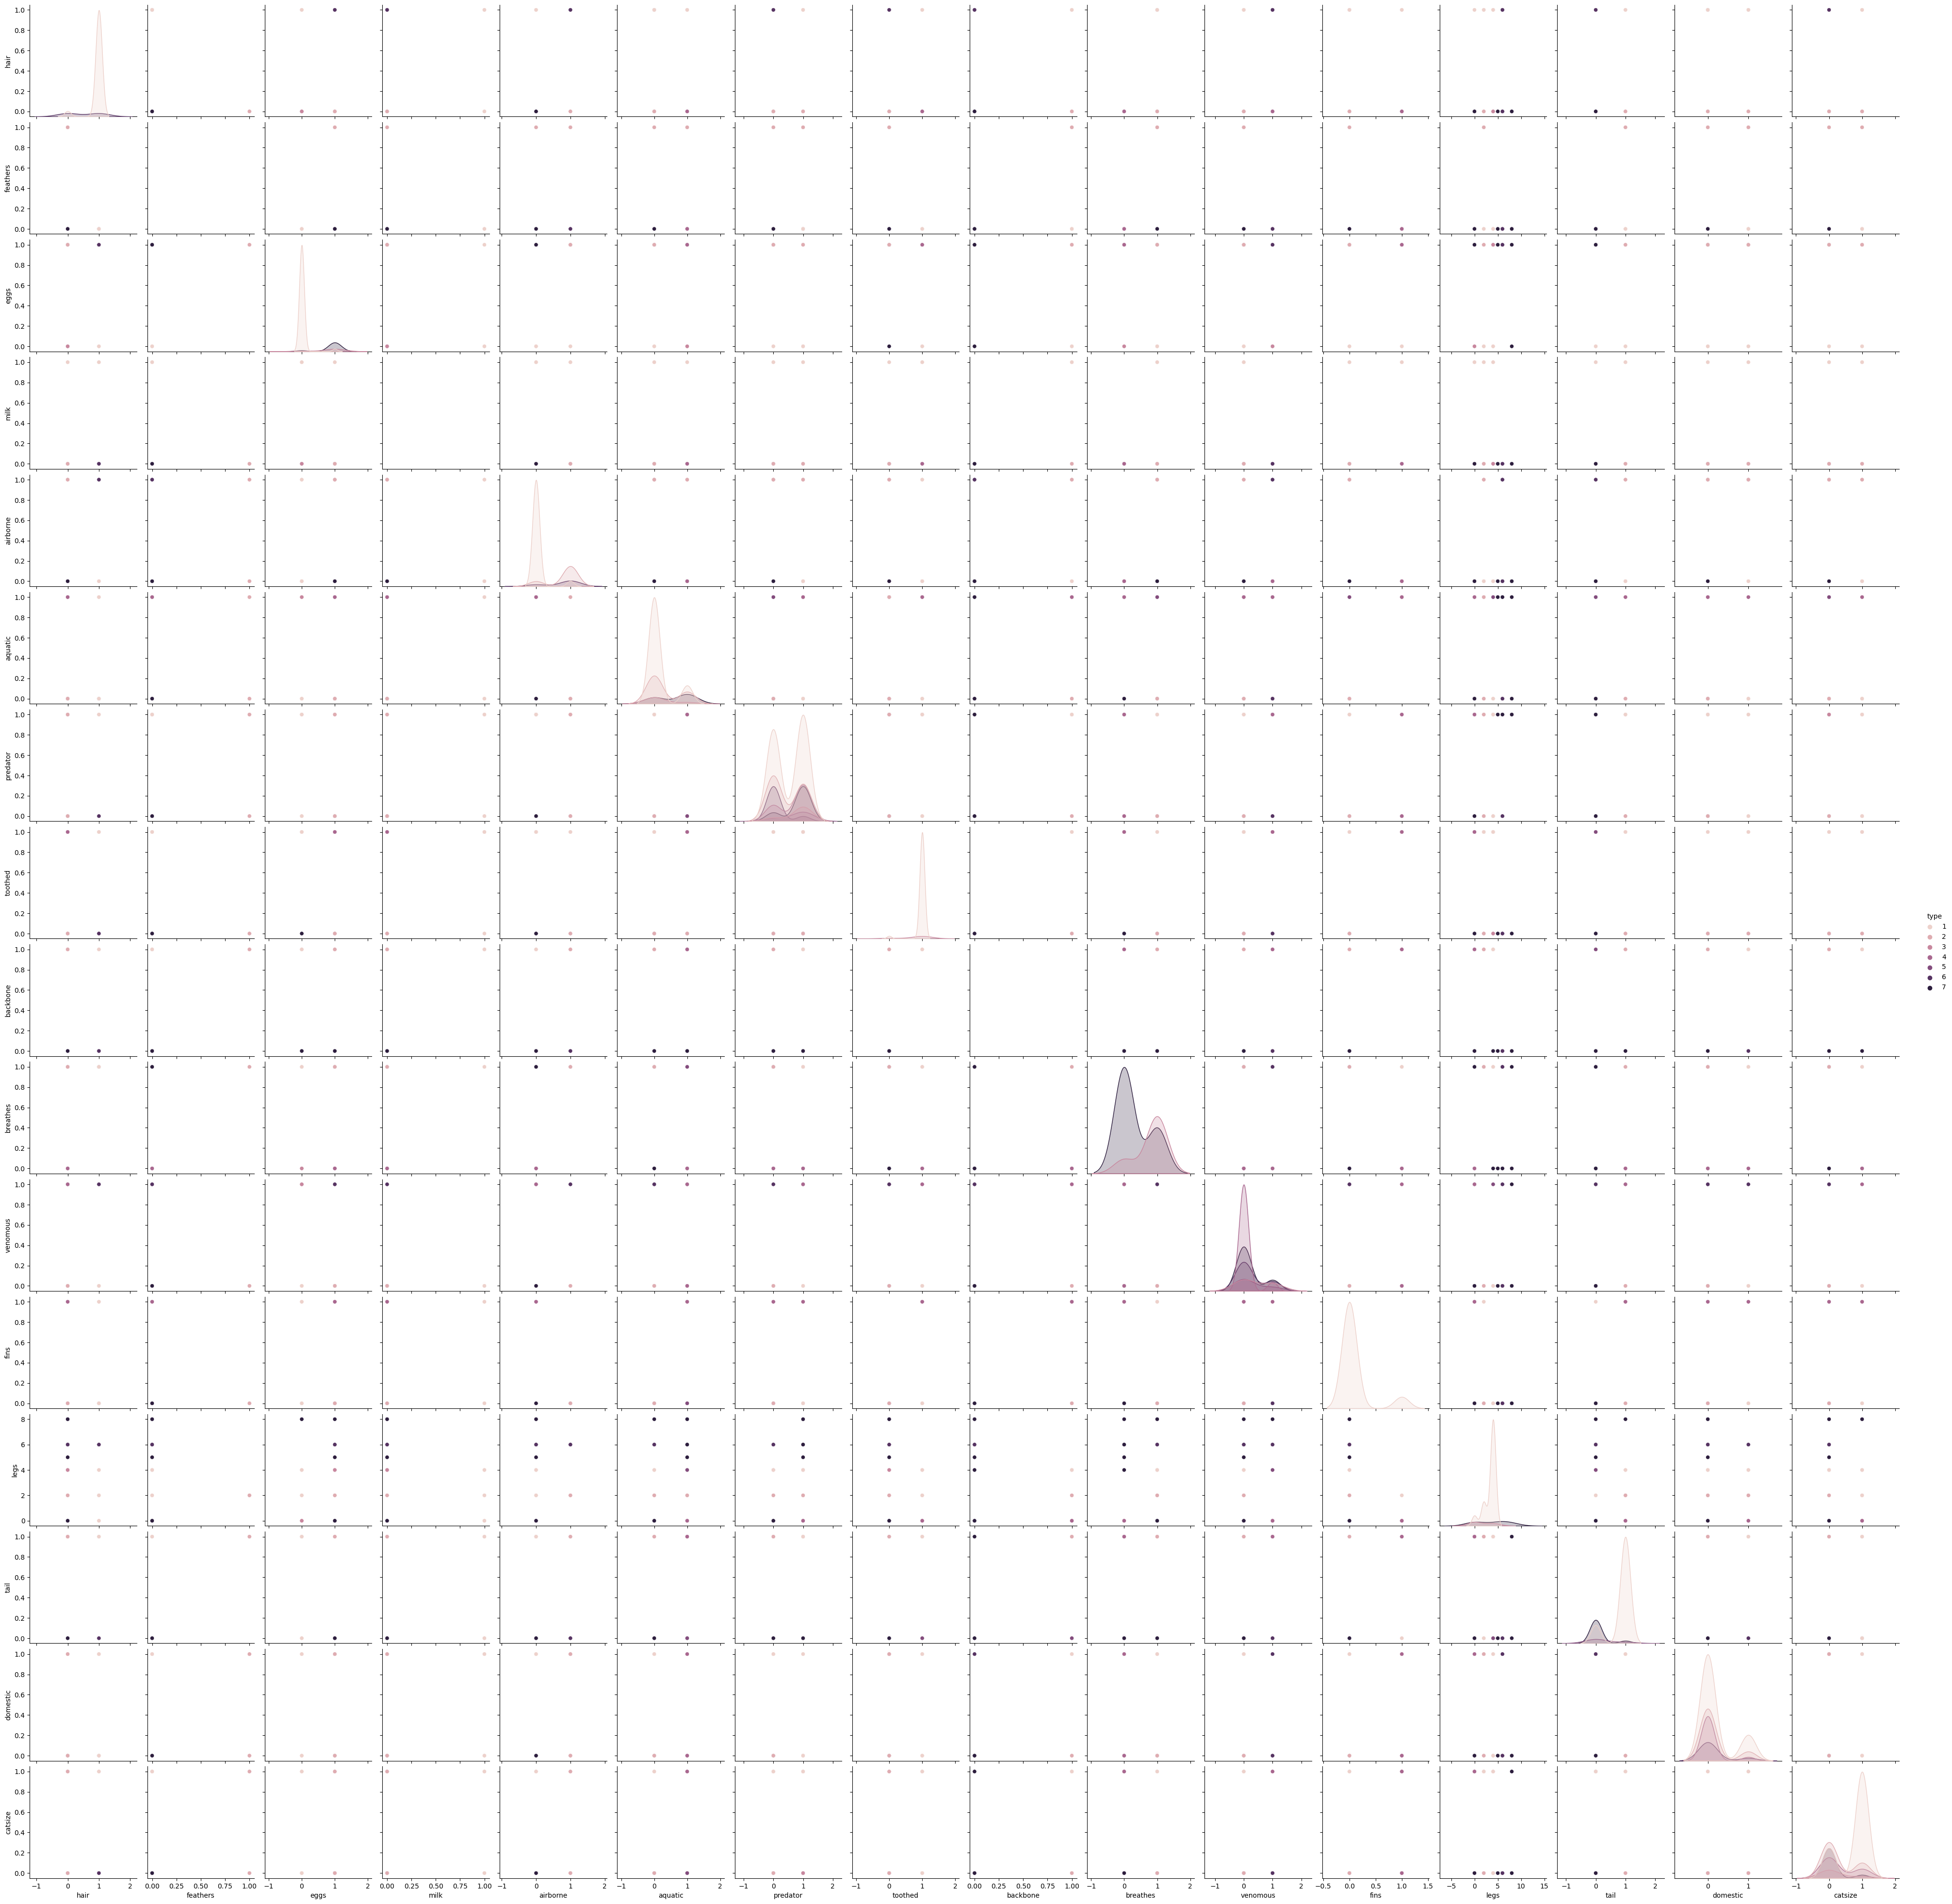

In [41]:
# let's plot pair plot to visualise the attributes all at once
plt.figure(figsize=(25,15))
sns.pairplot(data=data, hue = 'type')
plt.show()

In [42]:
cor = data.corr()
cor

hair  feathers      eggs      milk  airborne   aquatic  \
hair      1.000000 -0.427851 -0.817382  0.878503 -0.198431 -0.473554   
feathers -0.427851  1.000000  0.419248 -0.410761  0.656553 -0.058552   
eggs     -0.817382  0.419248  1.000000 -0.938848  0.376646  0.376244   
milk      0.878503 -0.410761 -0.938848  1.000000 -0.366765 -0.362613   
airborne -0.198431  0.656553  0.376646 -0.366765  1.000000 -0.172638   
aquatic  -0.473554 -0.058552  0.376244 -0.362613 -0.172638  1.000000   
predator -0.154769 -0.104430  0.011605 -0.029721 -0.295181  0.375978   
toothed   0.492531 -0.613631 -0.642150  0.628168 -0.594311  0.053150   
backbone  0.191681  0.231403 -0.340420  0.384958 -0.104718  0.022463   
breathes  0.441149  0.254588 -0.382777  0.423527  0.286039 -0.637506   
venomous -0.104245 -0.145739  0.098689 -0.242449  0.008528  0.087915   
fins     -0.280313 -0.223541  0.164796 -0.156328 -0.251157  0.604492   
legs      0.394009 -0.206686 -0.224918  0.214196  0.043712 -0.360638   
tail      0.048973  0.292569 -0.221090  0.210026  0.009482 -0.034642   
domestic  0.207208  0.031586 -0.155610  0.163928  0.063274 -0.224308   
catsize   0.455020 -0.135934 -0.514650  0.574906 -0.349768 -0.111866   
type     -0.562384 -0.197520  0.661825 -0.723683  0.022677  0.326639   

          predator   toothed  backbone  breathes  venomous      fins  \
hair     -0.154769  0.492531  0.191681  0.441149 -0.104245 -0.280313   
feathers -0.104430 -0.613631  0.231403  0.254588 -0.145739 -0.223541   
eggs      0.011605 -0.642150 -0.340420 -0.382777  0.098689  0.164796   
milk     -0.029721  0.628168  0.384958  0.423527 -0.242449 -0.156328   
airborne -0.295181 -0.594311 -0.104718  0.286039  0.008528 -0.251157   
aquatic   0.375978  0.053150  0.022463 -0.637506  0.087915  0.604492   
predator  1.000000  0.129452  0.051022 -0.262931  0.115391  0.190302   
toothed   0.129452  1.000000  0.575085 -0.065690 -0.062344  0.364292   
backbone  0.051022  0.575085  1.000000  0.207666 -0.246611  0.209499   
breathes -0.262931 -0.065690  0.207666  1.000000 -0.120752 -0.617219   
venomous  0.115391 -0.062344 -0.246611 -0.120752  1.000000 -0.033956   
fins      0.190302  0.364292  0.209499 -0.617219 -0.033956  1.000000   
legs     -0.099723 -0.193476 -0.432856  0.369868  0.022964 -0.605652   
tail      0.018947  0.310368  0.731762  0.088952 -0.162724  0.204349   
domestic -0.309794  0.069430  0.101733  0.124068 -0.003252 -0.093887   
catsize   0.144790  0.344010  0.356976  0.204125 -0.183748  0.031705   
type      0.061179 -0.471527 -0.828845 -0.519308  0.321476  0.099430   

              legs      tail  domestic   catsize      type  
hair      0.394009  0.048973  0.207208  0.455020 -0.562384  
feathers -0.206686  0.292569  0.031586 -0.135934 -0.197520  
eggs     -0.224918 -0.221090 -0.155610 -0.514650  0.661825  
milk      0.214196  0.210026  0.163928  0.574906 -0.723683  
airborne  0.043712  0.009482  0.063274 -0.349768  0.022677  
aquatic  -0.360638 -0.034642 -0.224308 -0.111866  0.326639  
predator -0.099723  0.018947 -0.309794  0.144790  0.061179  
toothed  -0.193476  0.310368  0.069430  0.344010 -0.471527  
backbone -0.432856  0.731762  0.101733  0.356976 -0.828845  
breathes  0.369868  0.088952  0.124068  0.204125 -0.519308  
venomous  0.022964 -0.162724 -0.003252 -0.183748  0.321476  
fins     -0.605652  0.204349 -0.093887  0.031705  0.099430  
legs      1.000000 -0.348295  0.073931  0.068791  0.131693  
tail     -0.348295  1.000000  0.023434  0.243277 -0.631830  
domestic  0.073931  0.023434  1.000000  0.020073 -0.181043  
catsize   0.068791  0.243277  0.020073  1.000000 -0.521030  
type      0.131693 -0.631830 -0.181043 -0.521030  1.000000

corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.

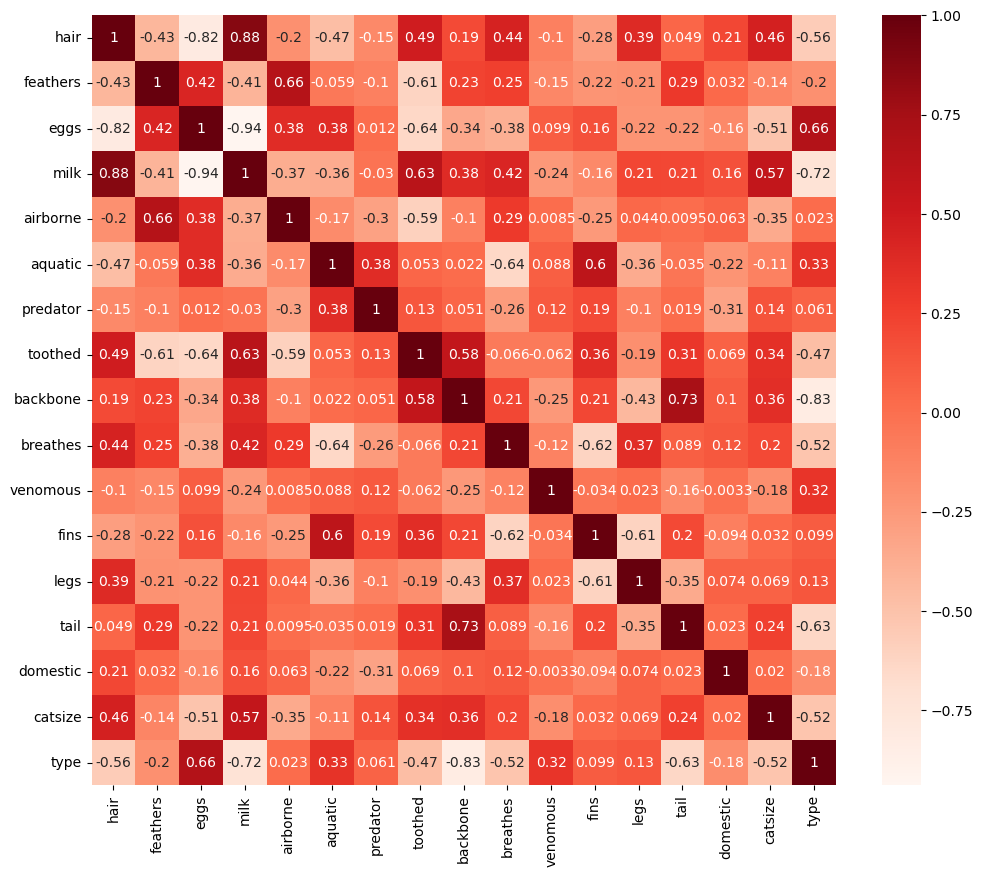

In [43]:
#checking corelation 
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Building Model using KNN

In [44]:
#importing required libraries 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [45]:
data.shape

(101, 18)

In [46]:
data['type'].dtype

dtype('int64')

In [47]:
#array = data.values
array=data.values
X = array[:, 1:17]
Y = array[:, 17]

In [48]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=object)

In [68]:
Y=Y.astype(int)

In [69]:
kf=KFold(n_splits=5)

#### KFold helps us to avoid overfitting. As we know when a model is trained using all of the data in a single short and give the best performance accuracy. To resist this k-fold cross-validation helps us to build the model is a generalized one.

In [70]:
model=KNeighborsClassifier(n_neighbors=3)  #here we are defining the value of k by our own
result=cross_val_score(model,X,Y,cv=kf)

In [71]:
result

array([0.95238095, 1.        , 1.        , 0.7       , 0.9       ])

In [72]:
print(round(result.mean()*100,2))

91.05


In [73]:
print(result.std()*100)

11.153027511655166


## Techniques to find the value of k

### 1.Grid Search for Algorithm Tuning

Grid search is the simplest algorithm for hyperparameter tuning. Basically, we divide the domain of the hyperparameters into a discrete grid. Then, we try every combination of values of this grid, calculating some performance metrics using cross-validation.

In [74]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

In [75]:
#definig range for k value
n_nbrs=np.array([2*i+1 for i in range(0,10)])
p_g=dict(n_neighbors=n_nbrs)

In [76]:
p_g

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

In [77]:
kn = KNeighborsClassifier()
grid=GridSearchCV(estimator=kn,param_grid=p_g,cv=5)
grid.fit(X,Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])})

In [78]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


In [79]:
#now from Grid search algorithm we have got the value of k
model=KNeighborsClassifier(n_neighbors=1)  
result1=cross_val_score(model,X,Y,cv=kf)

In [80]:
result1

array([1.  , 1.  , 1.  , 0.85, 0.9 ])

In [81]:
print(round(result1.mean()*100,4))

95.0


In [82]:
print(result1.std()*100)

6.32455532033676


### 2.Visualizing the CV results

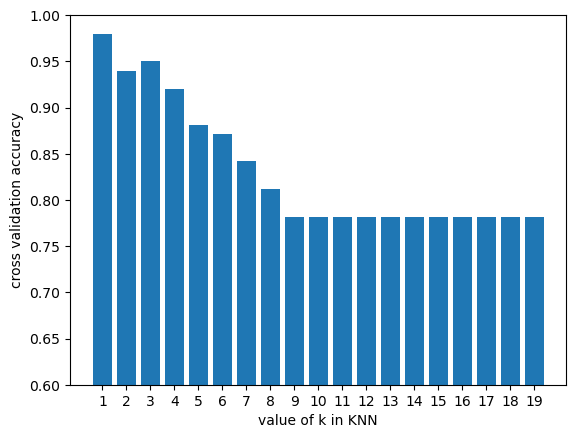

Best accuracy is : 0.7818181818181819


In [83]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 20)

# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

plt.bar(k_range,k_scores)
plt.xlabel('value of k in KNN')
plt.ylabel('cross validation accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()
print("Best accuracy is :",(scores.mean()))

### Here in this above graph value to k=1 is giving highest cross validation accuracy. 

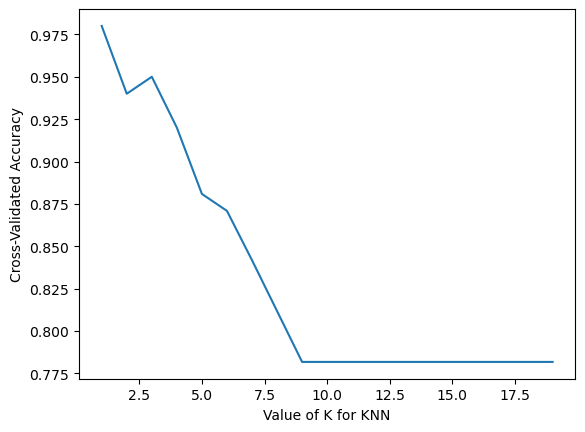

Best accuracy is : 0.7818181818181819


In [84]:
# choose k between 1 to 19
k_range = range(1, 20)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
print("Best accuracy is :",(scores.mean()))

### Here in this above graph value to k=1 is giving highest cross validation accuracy. 